In [84]:
import obspy
import numpy as np
import os
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm

In [81]:
in_dir = '../../data/banner/out/'

In [82]:
l = os.listdir(in_dir)
r = []
for i in l:
    j = i[5:11]
    if j not in r:
        r.append(j)
r.sort()

In [94]:
filter_freq = [(1,2),(2,3),(3,5),(5,10)]
filter_freq = [(.001,.01)]
# a = 0
for freqs in filter_freq:
    full = obspy.Stream()
    for d in tqdm(r):
        # a += 1
        # if a == 3 or a ==4:
        for f in glob(os.path.join(in_dir, f'c0be4{d}*'), recursive= True):
            tr = obspy.read(os.path.join(f))[0]
            tr.detrend("linear")
            #st.taper(max_percentage=0.05, type="hann")
            tr.filter(type = 'bandpass', freqmin = freqs[0], freqmax = freqs[1])
            new_tr = obspy.Trace(data = tr.data**2, header = tr.stats)
            new_tr.decimate(factor = 10, no_filter = True)
            full.append(new_tr)

100%|██████████| 47/47 [03:28<00:00,  4.43s/it]


In [115]:
full_test = full._cleanup()
full_test = full_test.merge(method = 1)

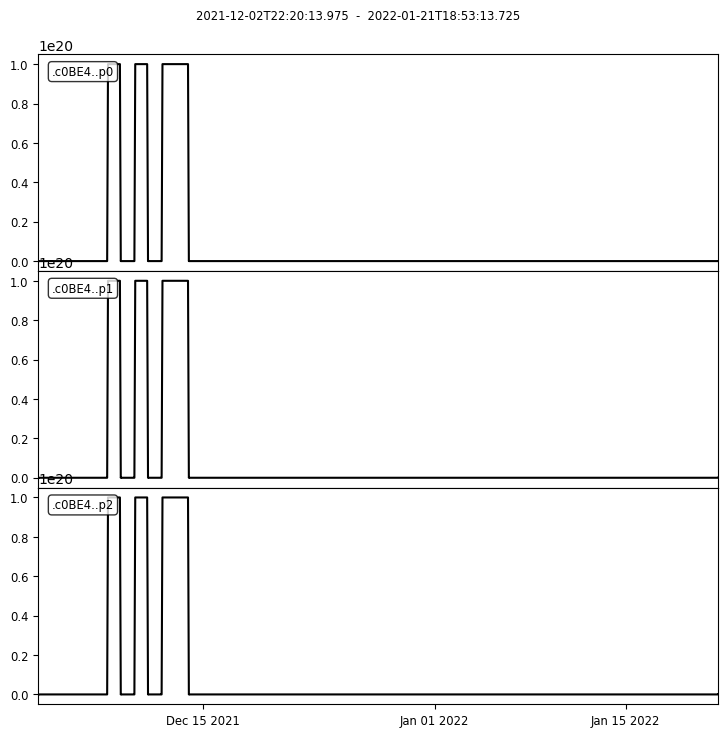

In [117]:
full_test.plot()
plt.show()

In [118]:
tr = full_test.select(channel = 'p2').pop()

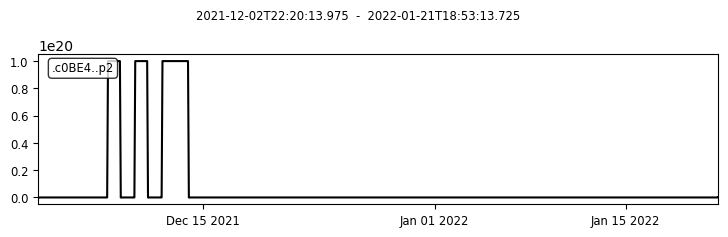

In [119]:
tr.plot()
plt.show()

In [122]:
tr.data.max()

1680615152.2133014

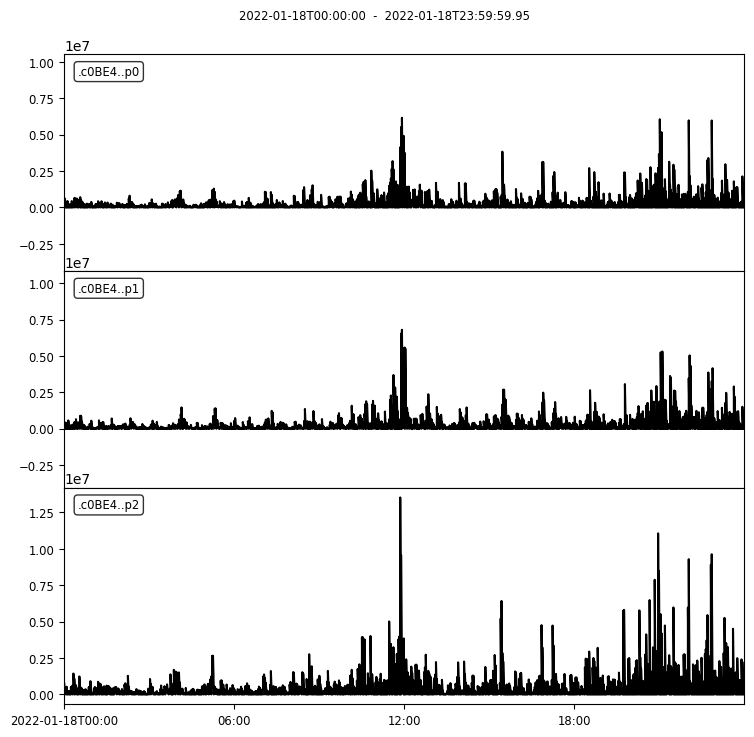

In [43]:
st_new.plot()
plt.show()